<a href="https://colab.research.google.com/github/Vamshi-B558/PRODIGY_Machine-Learning/blob/main/Food_Calories_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [9]:
h=pd.read_csv('/content/indian_food.csv',encoding='unicode_escape')
h.head(5)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [10]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [11]:
b=h.copy()

In [12]:
b.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [13]:
b[b.isnull().any(axis=1)]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [14]:
b[b['state']=='Uttar Pradesh']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
13,Petha,"Firm white pumpkin, sugar, kitchen lime, alum ...",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North
15,Rabri,"Condensed milk, sugar, spices, nuts",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North
18,Sohan halwa,"Corn flour, ghee, dry fruits",vegetarian,10,60,sweet,dessert,Uttar Pradesh,North
90,Kachori,"Moong dal, rava, garam masala, dough, fennel s...",vegetarian,30,60,spicy,snack,Uttar Pradesh,North
95,Kofta,"Paneer, potato, cream, corn flour, garam masala",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
97,Lauki ke kofte,"Bottle gourd, garam masala powder, gram flour,...",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
105,Navrattan korma,"Green beans, potatoes, khus khus, low fat, gar...",vegetarian,25,40,spicy,main course,Uttar Pradesh,North
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [15]:
b.loc[b.state=='Uttar Pradesh','region'] = 'North'
b[b['state'] == 'Uttar Pradesh']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
13,Petha,"Firm white pumpkin, sugar, kitchen lime, alum ...",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North
15,Rabri,"Condensed milk, sugar, spices, nuts",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North
18,Sohan halwa,"Corn flour, ghee, dry fruits",vegetarian,10,60,sweet,dessert,Uttar Pradesh,North
90,Kachori,"Moong dal, rava, garam masala, dough, fennel s...",vegetarian,30,60,spicy,snack,Uttar Pradesh,North
95,Kofta,"Paneer, potato, cream, corn flour, garam masala",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
97,Lauki ke kofte,"Bottle gourd, garam masala powder, gram flour,...",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
105,Navrattan korma,"Green beans, potatoes, khus khus, low fat, gar...",vegetarian,25,40,spicy,main course,Uttar Pradesh,North
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,North


In [16]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          255 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [17]:
b['state'].value_counts()

state
Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
-1                 24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Bihar               3
Goa                 3
Manipur             2
Jammu & Kashmir     2
Madhya Pradesh      2
Uttarakhand         1
Tripura             1
Nagaland            1
NCT of Delhi        1
Chhattisgarh        1
Haryana             1
Name: count, dtype: int64

In [18]:
b[b['state']=='-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1
10,Laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,-1,-1
12,Nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,-1,-1
94,Khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,-1,-1
96,Kulfi falooda,"Rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,45,25,sweet,dessert,-1,-1
98,Lauki ki subji,"Bottle gourd, coconut oil, garam masala, ginge...",vegetarian,10,20,spicy,main course,-1,-1
109,Pani puri,"Kala chana, mashed potato, boondi, sev, lemon",vegetarian,15,2,spicy,snack,-1,-1
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5,5,spicy,snack,-1,-1
115,Rajma chaval,"Red kidney beans, garam masala powder, ginger,...",vegetarian,15,90,spicy,main course,-1,North


In [19]:
b.loc[b['state']=='-1','state']='Ohters'
b.loc[b['region']=='-1','region']='Others'
b.loc[b['flavor_profile']=='-1','flavor_profile']='Others'
b.loc[b['prep_time']=='-1','prep_time']='0'
b.loc[b['cook_time']=='-1','cook_time']='0'

In [20]:
b['prep_time'] = b['prep_time'].astype(int)

In [21]:
b['cook_time']=b['cook_time'].astype(int)

In [22]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          255 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [23]:
b['total_time']=b.cook_time+b.prep_time
b.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,70
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,110
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,75
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,55


In [24]:
y=b['diet'].value_counts()
y

diet
vegetarian        226
non vegetarian     29
Name: count, dtype: int64

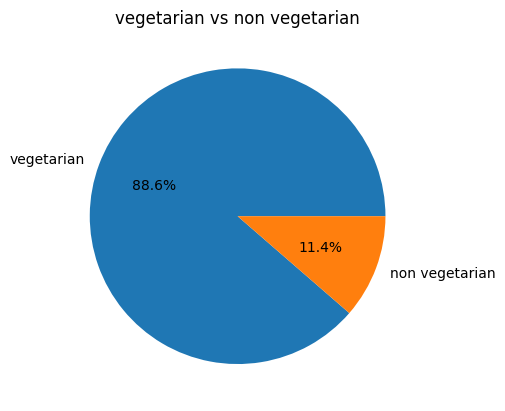

In [25]:
plt.pie(y.values, labels=y.index, autopct='%1.1f%%')
plt.title('vegetarian vs non vegetarian')
plt.show()

In [26]:
b.head(3)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,70
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,110
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,75


In [27]:
g=b['region'].value_counts()
g

region
West          74
South         59
North         50
East          31
North East    25
Others        13
Central        3
Name: count, dtype: int64

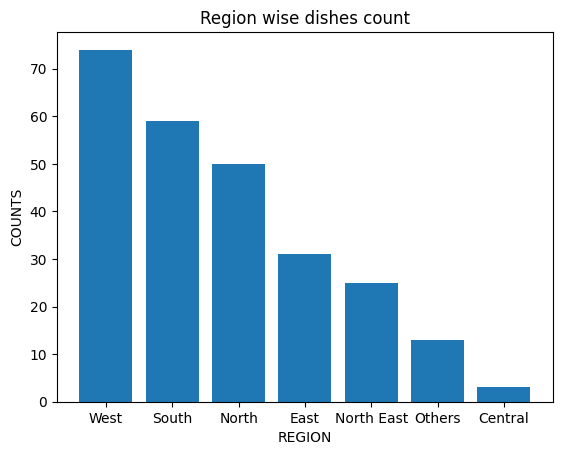

In [28]:
plt.bar(g.index,g.values)
plt.xlabel('REGION')
plt.ylabel('COUNTS')
plt.title('Region wise dishes count')
plt.show()

In [29]:
b.head(3)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,70
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,110
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,75


In [30]:
b['total_time']=b['total_time'].astype(int)

In [31]:
s = b[['name', 'total_time']].set_index('name')
s

,total_time
name,
Balu shahi,70
Boondi,110
Gajar ka halwa,75
Ghevar,45
Gulab jamun,55
...,...
Til Pitha,35
Bebinca,80
Shufta,-2


In [32]:
q=s.sort_values(by=['total_time'],ascending=False)
o=q[0:10]
o

,total_time
name,
Shrikhand,730
Pindi chana,620
Puttu,535
Misti doi,510
Dosa,450
Masala Dosa,450
Idli,450
Poornalu,300
Chak Hao Kheer,285


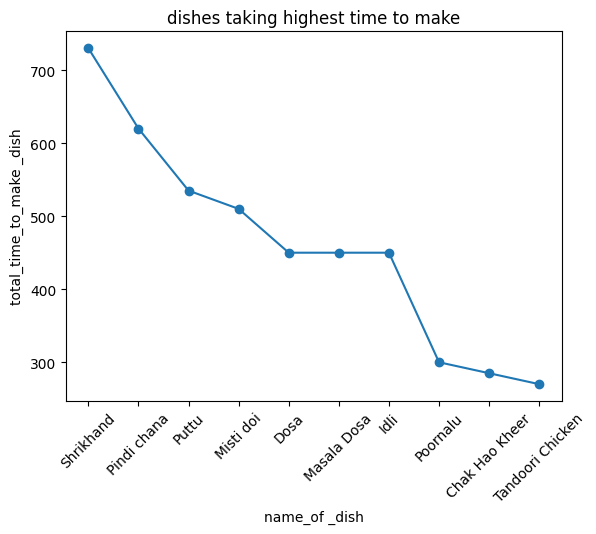

In [33]:
plt.plot(o.index,o.values,marker='o')
plt.xlabel('name_of _dish')
plt.ylabel('total_time_to_make _dish')
plt.title('dishes taking highest time to make')
plt.xticks(rotation=45)
plt.show()

In [34]:
b.head(3)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,70
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,110
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,75


In [35]:
r=b[b['flavor_profile']=='spicy']
r

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
64,Maach Jhol,"Fish, potol, tomato, chillies, ginger, garlic",non vegetarian,10,40,spicy,main course,Assam,North East,50
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East,-2
67,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5,15,spicy,main course,Nagaland,North East,20
68,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North,30
69,Aloo tikki,"Rice flour, potato, bread crumbs, garam masala...",vegetarian,5,20,spicy,main course,Punjab,North,25
...,...,...,...,...,...,...,...,...,...,...
240,Konir Dom,"Aloo, tomatoes, mustard oil, bay leaf, cinnamo...",non vegetarian,-1,-1,spicy,main course,Assam,North East,-2
241,Koldil Duck,"Rice flour, mutton, banana, gram flour, olive ...",non vegetarian,-1,-1,spicy,main course,Assam,North East,-2
242,Masor Koni,"Fish roe, pumpkin flowers, mustard oil, turmer...",non vegetarian,-1,-1,spicy,main course,Assam,North East,-2
247,Prawn malai curry,"Coconut milk, prawns, garlic, turmeric, sugar",non vegetarian,15,50,spicy,main course,West Bengal,East,65


In [37]:

k=r[['name','cook_time']].set_index(['name'])
x=k.sort_values(by=['cook_time'],ascending=False)
z=x[0:10]
z

,cook_time
name,
Pindi chana,120
Biryani,120
Daal baati churma,90
Idli,90
Dosa,90
Rajma chaval,90
Kuzhakkattai,90
Masala Dosa,90
Litti chokha,60


In [38]:
j=r[['name','prep_time']].set_index(['name'])
w=j.sort_values(by=['prep_time'],ascending=False)
m=w[0:10]
m

,prep_time
name,
Pindi chana,500
Masala Dosa,360
Dosa,360
Idli,360
Tandoori Fish Tikka,240
Tandoori Chicken,240
Attu,150
Idiappam,120
Pesarattu,120


In [39]:
n = pd.merge(m,z, left_index=True, right_index=True, how='inner',suffixes = (' ', ' '),)
n

,prep_time,cook_time
name,,
Pindi chana,500,120
Masala Dosa,360,90
Dosa,360,90
Idli,360,90


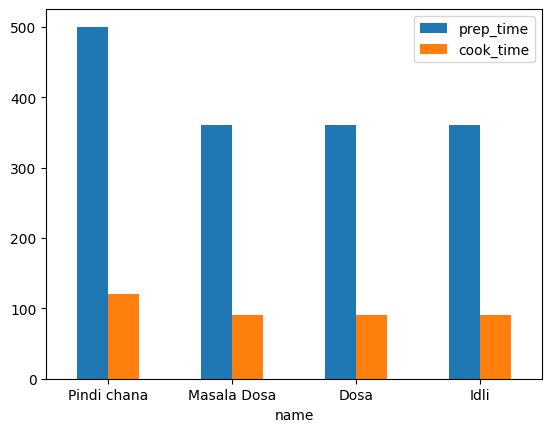

In [40]:
import matplotlib.pyplot as plot
import pandas as pd
df = pd.DataFrame(n,columns=['prep_time', 'cook_time'], index = n.index)
df.plot.bar()
plt.xticks(rotation=0)
plot.show()

In [41]:
b.head(3)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,70
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,110
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,75


In [42]:
b['course'].unique()

array(['dessert', 'main course', 'starter', 'snack'], dtype=object)

In [43]:
h=b[b['diet']=='non vegetarian']
h

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
64,Maach Jhol,"Fish, potol, tomato, chillies, ginger, garlic",non vegetarian,10,40,spicy,main course,Assam,North East,50
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East,-2
67,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5,15,spicy,main course,Nagaland,North East,20
75,Biryani,"Chicken thighs, basmati rice, star anise, swee...",non vegetarian,30,120,spicy,main course,Telangana,South,150
76,Butter chicken,"Chicken, greek yogurt, cream, garam masala pow...",non vegetarian,10,35,spicy,main course,NCT of Delhi,North,45
79,Chicken razala,"Chicken, dahi, sesame seeds, garam masala powd...",non vegetarian,10,35,spicy,main course,West Bengal,East,45
80,Chicken Tikka masala,"Naan bread, tomato sauce, skinless chicken bre...",non vegetarian,10,50,spicy,main course,Punjab,North,60
81,Chicken Tikka,"Chicken, whole wheat bread, rice flour, garam ...",non vegetarian,120,45,spicy,starter,Punjab,North,165
122,Tandoori Chicken,"Greek yogurt, garam masala, kasuri methi, mari...",non vegetarian,240,30,spicy,main course,Punjab,North,270
123,Tandoori Fish Tikka,"Chickpea flour, biryani masala powder, yogurt,...",non vegetarian,240,30,spicy,starter,Punjab,North,270


In [44]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 64 to 247
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            29 non-null     object
 1   ingredients     29 non-null     object
 2   diet            29 non-null     object
 3   prep_time       29 non-null     int64 
 4   cook_time       29 non-null     int64 
 5   flavor_profile  29 non-null     object
 6   course          29 non-null     object
 7   state           29 non-null     object
 8   region          29 non-null     object
 9   total_time      29 non-null     int64 
dtypes: int64(3), object(7)
memory usage: 2.5+ KB


In [45]:
i=h['state'].value_counts()
i

state
Assam           10
West Bengal      5
Punjab           4
Maharashtra      2
Tripura          1
Nagaland         1
Telangana        1
NCT of Delhi     1
Kerala           1
Tamil Nadu       1
Goa              1
Manipur          1
Name: count, dtype: int64

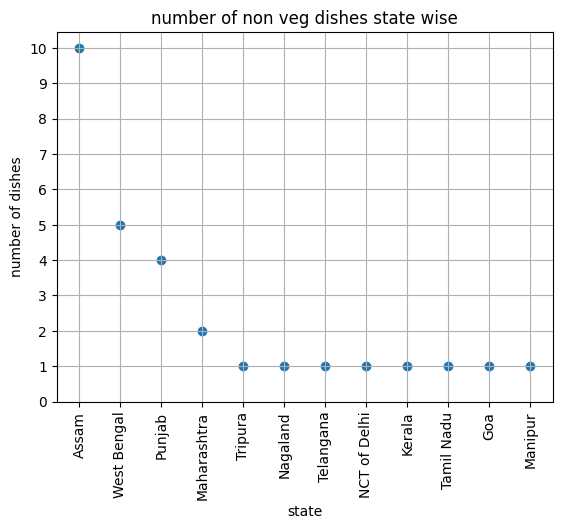

In [46]:
plt.scatter(i.index, i.values)
plt.xlabel('state')
plt.ylabel('number of dishes')
plt.title('number of non veg dishes state wise')
plt.xticks(rotation=90)
plt.yticks(range(0,11,1))
plt.grid(True)
plt.show()